# Neural Network Assignment

## Dataset - gas_turbines

In [2]:
# Importing necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

In [76]:
# Load dataset

data = pd.read_csv('C:/Users/DELL 5459/Downloads/excelr/Assignment/16 Neural Network/gas_turbines.csv')
data.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [77]:
data.shape

(15039, 11)

In [78]:
data.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [80]:
data[data.duplicated()]

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX


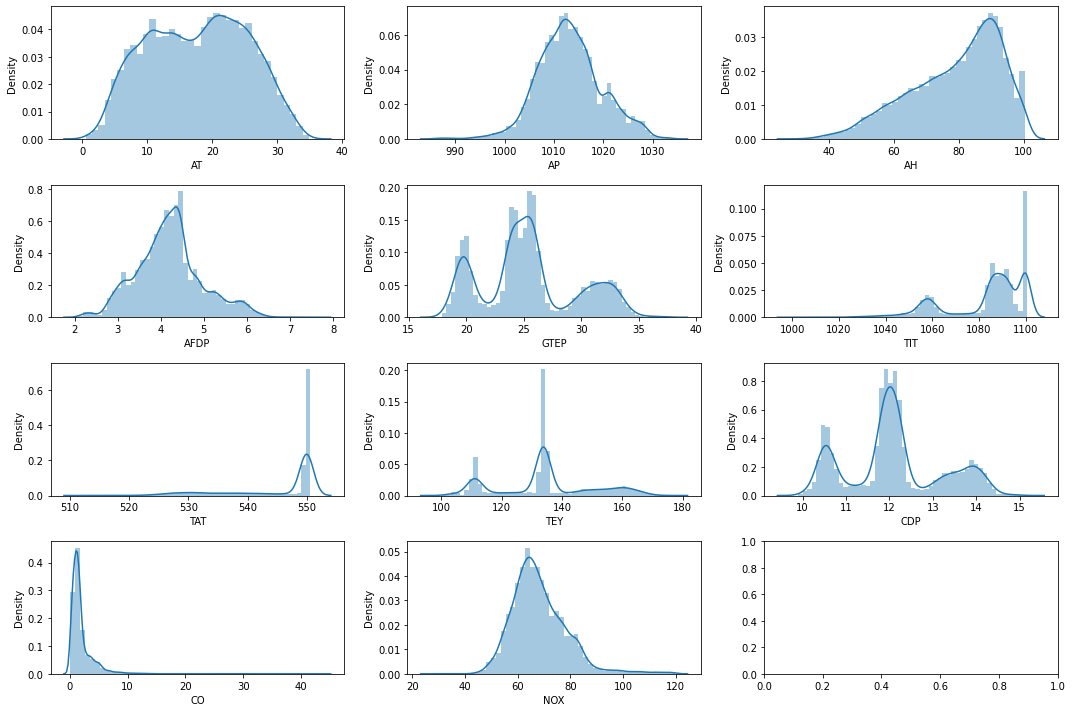

In [81]:
# Check the distribution and outliers

import warnings
warnings.filterwarnings('ignore')

fig, ax = plt.subplots(4, 3, figsize=(15,10))
sns.distplot(data.AT, ax=ax[0,0])
sns.distplot(data.AP, ax = ax[0,1])
sns.distplot(data.AH, ax = ax[0,2])
sns.distplot(data.AFDP, ax = ax[1,0])
sns.distplot(data.GTEP, ax = ax[1,1])
sns.distplot(data.TIT, ax = ax[1,2])
sns.distplot(data.TAT, ax = ax[2,0])
sns.distplot(data.TEY, ax = ax[2,1])
sns.distplot(data.CDP, ax = ax[2,2])
sns.distplot(data.CO, ax = ax[3,0])
sns.distplot(data.NOX, ax = ax[3,1])

plt.tight_layout()
plt.show()

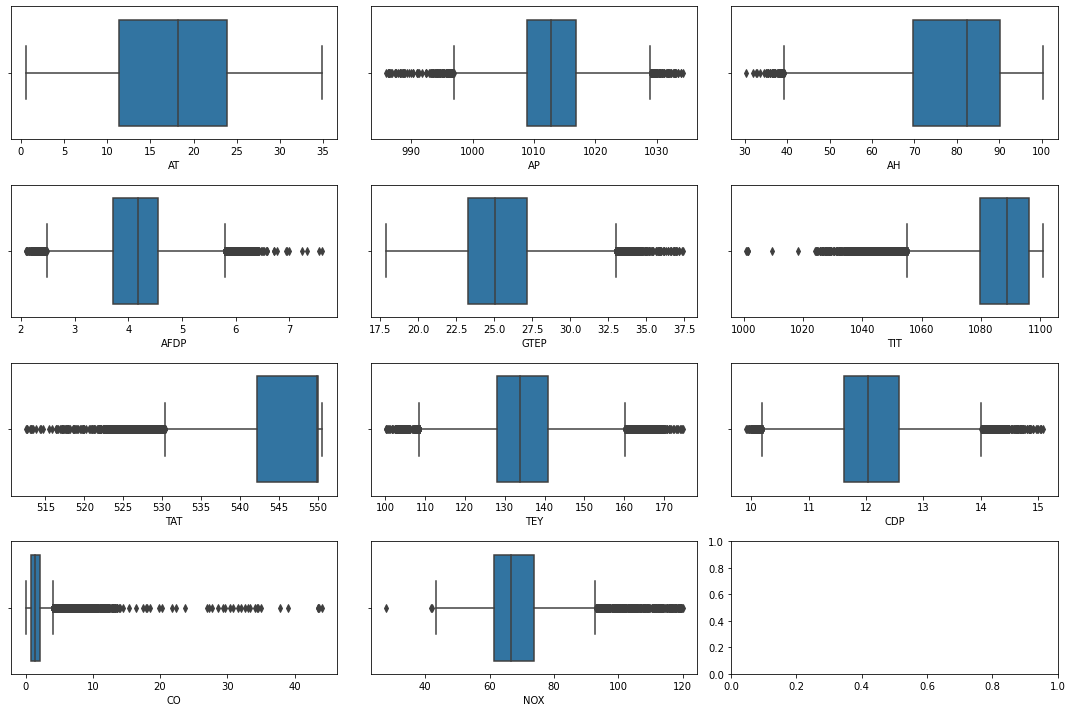

In [82]:
# Checking outliers

fig, ax = plt.subplots(4,3, figsize = (15,10))

sns.boxplot(data.AT, ax = ax[0,0])
sns.boxplot(data.AP, ax = ax[0,1])
sns.boxplot(data.AH, ax = ax[0,2])
sns.boxplot(data.AFDP, ax = ax[1,0])
sns.boxplot(data.GTEP, ax = ax[1,1])
sns.boxplot(data.TIT, ax = ax[1,2])
sns.boxplot(data.TAT, ax = ax[2,0])
sns.boxplot(data.TEY, ax = ax[2,1])
sns.boxplot(data.CDP, ax = ax[2,2])
sns.boxplot(data.CO, ax = ax[3,0])
sns.boxplot(data.NOX, ax = ax[3,1])

plt.tight_layout()
plt.show()

In [83]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
data1=pd.DataFrame(scale.fit_transform(data),columns=['AT','AP','AH','AFDP','GTEP','TIT','TAT','TEY','CDP','CO','NOX'])
data1

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,0.184182,0.456050,0.951314,0.255758,0.091426,0.584,0.984015,0.195191,0.135340,0.071522,0.596548
1,0.182020,0.466391,0.955881,0.255721,0.094755,0.585,0.984015,0.195459,0.133988,0.073372,0.597134
2,0.185295,0.474664,0.939003,0.252571,0.097367,0.586,0.980608,0.195325,0.134567,0.072576,0.593791
3,0.189922,0.482937,0.929126,0.252227,0.098033,0.588,0.983753,0.195459,0.135533,0.072375,0.595984
4,0.199830,0.493278,0.927708,0.255323,0.096650,0.589,0.983491,0.195459,0.136692,0.073647,0.592087
...,...,...,...,...,...,...,...,...,...,...,...
15034,0.247272,0.408480,0.975092,0.263380,0.065868,0.489,0.884696,0.153681,0.095739,0.102448,0.562214
15035,0.214075,0.414685,0.984153,0.256826,0.078672,0.455,0.806342,0.155965,0.102113,0.109894,0.566100
15036,0.195962,0.422958,0.989922,0.251593,0.084614,0.369,0.651730,0.134605,0.111772,0.180552,0.685449
15037,0.188443,0.433299,0.982936,0.246451,0.076777,0.424,0.754455,0.141994,0.121431,0.141693,0.710578


In [84]:
data1

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,0.184182,0.456050,0.951314,0.255758,0.091426,0.584,0.984015,0.195191,0.135340,0.071522,0.596548
1,0.182020,0.466391,0.955881,0.255721,0.094755,0.585,0.984015,0.195459,0.133988,0.073372,0.597134
2,0.185295,0.474664,0.939003,0.252571,0.097367,0.586,0.980608,0.195325,0.134567,0.072576,0.593791
3,0.189922,0.482937,0.929126,0.252227,0.098033,0.588,0.983753,0.195459,0.135533,0.072375,0.595984
4,0.199830,0.493278,0.927708,0.255323,0.096650,0.589,0.983491,0.195459,0.136692,0.073647,0.592087
...,...,...,...,...,...,...,...,...,...,...,...
15034,0.247272,0.408480,0.975092,0.263380,0.065868,0.489,0.884696,0.153681,0.095739,0.102448,0.562214
15035,0.214075,0.414685,0.984153,0.256826,0.078672,0.455,0.806342,0.155965,0.102113,0.109894,0.566100
15036,0.195962,0.422958,0.989922,0.251593,0.084614,0.369,0.651730,0.134605,0.111772,0.180552,0.685449
15037,0.188443,0.433299,0.982936,0.246451,0.076777,0.424,0.754455,0.141994,0.121431,0.141693,0.710578


In [85]:
# Extracting independent and dependent variables

X = data1.drop(axis =0, columns ='TEY').values
Y = data1['TEY'].values

In [86]:
X

array([[0.18418215, 0.45604964, 0.95131413, ..., 0.1353398 , 0.07152212,
        0.59654817],
       [0.18201978, 0.4663909 , 0.95588067, ..., 0.13398756, 0.07337235,
        0.59713433],
       [0.18529531, 0.47466391, 0.93900309, ..., 0.13456709, 0.07257648,
        0.59379104],
       ...,
       [0.19596183, 0.4229576 , 0.98992213, ..., 0.11177221, 0.18055195,
        0.68544912],
       [0.18844295, 0.43329886, 0.98293633, ..., 0.12143106, 0.14169257,
        0.71057802],
       [0.18617304, 0.44157187, 0.96182146, ..., 0.1310899 , 0.11294597,
        0.70266486]])

In [87]:
Y

array([0.19519076, 0.19545943, 0.19532509, ..., 0.13460505, 0.14199355,
       0.15327781])

In [88]:
# Fix random seed for reproducibility

seed = 7
np.random.seed(seed)

In [89]:
# Create model

model = Sequential()
model.add(Dense(12, input_dim =10, kernel_initializer = 'uniform', activation ='relu'))
model.add(Dense(8, kernel_initializer ='uniform', activation ='relu'))
model.add(Dense(1, kernel_initializer ='uniform', activation ='sigmoid'))

In [90]:
# Compile model

model.compile(loss = 'mse', optimizer='adam', metrics=['accuracy'])

In [91]:
# Fit the model
model.fit(X,Y, validation_split=0.33, epochs =100, batch_size=10)

Epoch 1/100
1008/1008 [==============================] - 2s 1ms/step - loss: 0.0094 - accuracy: 9.9246e-05 - val_loss: 0.0011 - val_accuracy: 2.0149e-04
Epoch 2/100
1008/1008 [==============================] - 1s 1ms/step - loss: 6.1584e-04 - accuracy: 9.9246e-05 - val_loss: 6.0122e-04 - val_accuracy: 2.0149e-04
Epoch 3/100
1008/1008 [==============================] - 1s 1ms/step - loss: 4.6484e-04 - accuracy: 9.9246e-05 - val_loss: 4.9608e-04 - val_accuracy: 2.0149e-04
Epoch 4/100
1008/1008 [==============================] - 1s 1ms/step - loss: 3.9252e-04 - accuracy: 9.9246e-05 - val_loss: 3.6389e-04 - val_accuracy: 2.0149e-04
Epoch 5/100
1008/1008 [==============================] - 1s 1ms/step - loss: 3.2669e-04 - accuracy: 9.9246e-05 - val_loss: 3.0290e-04 - val_accuracy: 2.0149e-04
Epoch 6/100
1008/1008 [==============================] - 2s 1ms/step - loss: 2.9535e-04 - accuracy: 9.9246e-05 - val_loss: 2.7901e-04 - val_accuracy: 2.0149e-04
Epoch 7/100
1008/1008 [===================

Epoch 52/100
1008/1008 [==============================] - 1s 1ms/step - loss: 2.6089e-04 - accuracy: 9.9246e-05 - val_loss: 2.3955e-04 - val_accuracy: 2.0149e-04
Epoch 53/100
1008/1008 [==============================] - 1s 1ms/step - loss: 2.6580e-04 - accuracy: 9.9246e-05 - val_loss: 2.4774e-04 - val_accuracy: 2.0149e-04
Epoch 54/100
1008/1008 [==============================] - 2s 2ms/step - loss: 2.6615e-04 - accuracy: 9.9246e-05 - val_loss: 2.3244e-04 - val_accuracy: 2.0149e-04
Epoch 55/100
1008/1008 [==============================] - 1s 1ms/step - loss: 2.6109e-04 - accuracy: 9.9246e-05 - val_loss: 2.3513e-04 - val_accuracy: 2.0149e-04
Epoch 56/100
1008/1008 [==============================] - 1s 1ms/step - loss: 2.6202e-04 - accuracy: 9.9246e-05 - val_loss: 2.5900e-04 - val_accuracy: 2.0149e-04
Epoch 57/100
1008/1008 [==============================] - 1s 1ms/step - loss: 2.6313e-04 - accuracy: 9.9246e-05 - val_loss: 4.0167e-04 - val_accuracy: 2.0149e-04
Epoch 58/100
1008/1008 [====

In [92]:
# evaluate the model
scores = model.evaluate(X,Y)
print('%s: %.2f%%' % (model.metrics_names[1], scores[1]*100))

470/470 [==============================] - 0s 853us/step - loss: 2.7614e-04 - accuracy: 1.3299e-04
accuracy: 0.01%


In [93]:
history = model.fit(X,Y, validation_split = 0.33, epochs= 100, batch_size =10)

Epoch 1/100
1008/1008 [==============================] - 1s 1ms/step - loss: 2.6040e-04 - accuracy: 9.9246e-05 - val_loss: 3.4386e-04 - val_accuracy: 2.0149e-04
Epoch 2/100
1008/1008 [==============================] - 1s 1ms/step - loss: 2.6168e-04 - accuracy: 9.9246e-05 - val_loss: 2.3974e-04 - val_accuracy: 2.0149e-04
Epoch 3/100
1008/1008 [==============================] - 1s 1ms/step - loss: 2.6239e-04 - accuracy: 9.9246e-05 - val_loss: 2.4537e-04 - val_accuracy: 2.0149e-04
Epoch 4/100
1008/1008 [==============================] - 1s 1ms/step - loss: 2.5857e-04 - accuracy: 9.9246e-05 - val_loss: 2.6245e-04 - val_accuracy: 2.0149e-04
Epoch 5/100
1008/1008 [==============================] - 1s 1ms/step - loss: 2.6083e-04 - accuracy: 9.9246e-05 - val_loss: 2.3348e-04 - val_accuracy: 2.0149e-04
Epoch 6/100
1008/1008 [==============================] - 1s 1ms/step - loss: 2.6136e-04 - accuracy: 9.9246e-05 - val_loss: 2.4177e-04 - val_accuracy: 2.0149e-04
Epoch 7/100
1008/1008 [===========

1008/1008 [==============================] - 1s 1ms/step - loss: 2.3225e-04 - accuracy: 9.9246e-05 - val_loss: 2.3187e-04 - val_accuracy: 2.0149e-04
Epoch 52/100
1008/1008 [==============================] - 2s 2ms/step - loss: 2.3028e-04 - accuracy: 9.9246e-05 - val_loss: 1.9420e-04 - val_accuracy: 2.0149e-04
Epoch 53/100
1008/1008 [==============================] - 1s 1ms/step - loss: 2.3503e-04 - accuracy: 9.9246e-05 - val_loss: 2.0126e-04 - val_accuracy: 2.0149e-04
Epoch 54/100
1008/1008 [==============================] - 1s 1ms/step - loss: 2.3338e-04 - accuracy: 9.9246e-05 - val_loss: 2.9486e-04 - val_accuracy: 2.0149e-04
Epoch 55/100
1008/1008 [==============================] - 1s 1ms/step - loss: 2.3433e-04 - accuracy: 9.9246e-05 - val_loss: 2.1027e-04 - val_accuracy: 2.0149e-04
Epoch 56/100
1008/1008 [==============================] - 1s 1ms/step - loss: 2.3701e-04 - accuracy: 9.9246e-05 - val_loss: 2.2538e-04 - val_accuracy: 2.0149e-04
Epoch 57/100
1008/1008 [=================

In [94]:
# Visualize training history
# List all the data in history
model.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

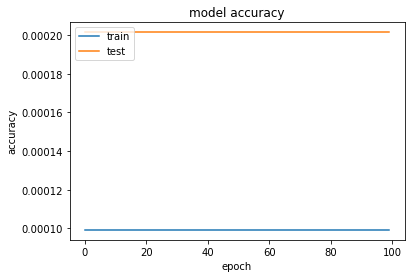

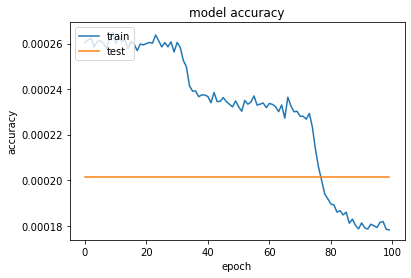

In [95]:
# Summarize history for accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Tuning of Hyperparameter :- Batch size and epochs


In [96]:
# Importing the necessary  libraries
from sklearn.model_selection import GridSearchCV, KFold
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam

In [97]:
# Create model

def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim= 10, kernel_initializer= 'uniform', activation= 'relu'))
    model.add(Dense(8, kernel_initializer= 'uniform', activation= 'relu'))
    model.add(Dense(1, kernel_initializer= 'uniform', activation='sigmoid'))
    
    adam = Adam(lr =0.01)
    
    model.compile(loss= 'mse', optimizer= adam, metrics= ['accuracy'])
    return model

In [98]:
# Create the model

model= KerasClassifier(build_fn = create_model, verbose = 0)

# Define the grid search parameters

batch_size = [10,20,40]
epochs = [10,50,100]

# Make a dicitionary of the grid search parameters

param_grid = dict(batch_size = batch_size, epochs = epochs)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = KFold(), verbose = 10)
grid_result = grid.fit(X,Y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............ batch_size=10, epochs=10, score=0.000, total=   9.8s
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.7s remaining:    0.0s


[CV] ............ batch_size=10, epochs=10, score=0.000, total=   9.4s
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   19.1s remaining:    0.0s


[CV] ............ batch_size=10, epochs=10, score=0.000, total=   9.6s
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   28.8s remaining:    0.0s


[CV] ............ batch_size=10, epochs=10, score=0.000, total=  10.4s
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   39.2s remaining:    0.0s


[CV] ............ batch_size=10, epochs=10, score=0.000, total=  10.1s
[CV] batch_size=10, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   49.3s remaining:    0.0s


[CV] ............ batch_size=10, epochs=50, score=0.000, total=  42.8s
[CV] batch_size=10, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  1.5min remaining:    0.0s


[CV] ............ batch_size=10, epochs=50, score=0.000, total=  44.3s
[CV] batch_size=10, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  2.3min remaining:    0.0s


[CV] ............ batch_size=10, epochs=50, score=0.000, total=  42.9s
[CV] batch_size=10, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  3.0min remaining:    0.0s


[CV] ............ batch_size=10, epochs=50, score=0.000, total=  43.1s
[CV] batch_size=10, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  3.7min remaining:    0.0s


[CV] ............ batch_size=10, epochs=50, score=0.000, total=  42.7s
[CV] batch_size=10, epochs=100 .......................................
[CV] ........... batch_size=10, epochs=100, score=0.000, total= 1.8min
[CV] batch_size=10, epochs=100 .......................................
[CV] ........... batch_size=10, epochs=100, score=0.000, total= 2.0min
[CV] batch_size=10, epochs=100 .......................................
[CV] ........... batch_size=10, epochs=100, score=0.000, total= 1.4min
[CV] batch_size=10, epochs=100 .......................................
[CV] ........... batch_size=10, epochs=100, score=0.000, total= 1.4min
[CV] batch_size=10, epochs=100 .......................................
[CV] ........... batch_size=10, epochs=100, score=0.000, total= 1.4min
[CV] batch_size=20, epochs=10 ........................................
[CV] ............ batch_size=20, epochs=10, score=0.000, total=   5.5s
[CV] batch_size=20, epochs=10 ........................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed: 21.7min finished


In [100]:
# Summarize the results

print('Best :{}, using {}'. format(grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{},{} with:{}'. format(mean, stdev, param))

Best :0.0, using {'batch_size': 10, 'epochs': 10}
0.0,0.0 with:{'batch_size': 10, 'epochs': 10}
0.0,0.0 with:{'batch_size': 10, 'epochs': 50}
0.0,0.0 with:{'batch_size': 10, 'epochs': 100}
0.0,0.0 with:{'batch_size': 20, 'epochs': 10}
0.0,0.0 with:{'batch_size': 20, 'epochs': 50}
0.0,0.0 with:{'batch_size': 20, 'epochs': 100}
0.0,0.0 with:{'batch_size': 40, 'epochs': 10}
0.0,0.0 with:{'batch_size': 40, 'epochs': 50}
0.0,0.0 with:{'batch_size': 40, 'epochs': 100}
